In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('/content/Levels_Fyi_Salary_Data.csv')
salaryDF = df[['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary']]
X = salaryDF.iloc[:, 1:]
print(X)


       yearsofexperience  yearsatcompany  basesalary
0                    1.5             1.5    107000.0
1                    5.0             3.0         0.0
2                    8.0             0.0    155000.0
3                    7.0             5.0    157000.0
4                    5.0             3.0         0.0
...                  ...             ...         ...
62637               10.0             1.0    155000.0
62638                2.0             2.0    146900.0
62639               14.0            12.0    157000.0
62640                8.0             4.0    194688.0
62641                0.0             0.0    155000.0

[62642 rows x 3 columns]


In [44]:
y_train = salaryDF.iloc[:50000,0]
y_test = salaryDF.iloc[50000:,0]
print(y_test)

50000    226000
50001     89000
50002    153000
50003    112000
50004    150000
          ...  
62637    327000
62638    237000
62639    220000
62640    280000
62641    200000
Name: totalyearlycompensation, Length: 12642, dtype: int64


In [45]:
#Storing number of rows
rows = X.shape[0]
N_train = 50000 # Number of training values which we are using
train_err = {}
test_err = {}
count = 0

## Functions for RMSE and calculating weights

In [46]:
def rmse(targets, prediction):
  return np.sqrt((np.square(targets-prediction)).mean())

def calculateWeights(x_train, y_train):
    w = np.linalg.inv(np.transpose(x_train).dot(x_train)).dot(np.transpose(x_train).dot(y_train))
    return w

In [51]:
for i in range(1,6):
  A = np.ones([rows,(3*i)+1])
  for j in range(0, 3):
    for k in range(1, i+1):
      A[:,count] = np.power(np.array(X.iloc[:, j]).T, k)
      count = count+1
  #splitting the x-values with monomials into training and testing
  x_train = A[0:N_train, :]
  x_test = A[N_train: , :]
  w = calculateWeights(x_train, y_train)

  #Calculate training error
  y_train_pred = x_train.dot(w)
  rms_train = rmse(y_train, y_train_pred)
  train_err[i] = rms_train
  print(rms_train)

  #Calculate test error
  y_test_pred = x_test.dot(w)
  rms_train = rmse(y_test, y_test_pred)
  test_err[i] = rms_train
  print(rms_train)

  count = 0

92469.43809773923
121382.52351504721
91573.99026037067
129644.37305767846
82679.30803704042
450246.99729034357
76200.18255097706
1486057.670633349
75412.29147140689
1535500.4794139846


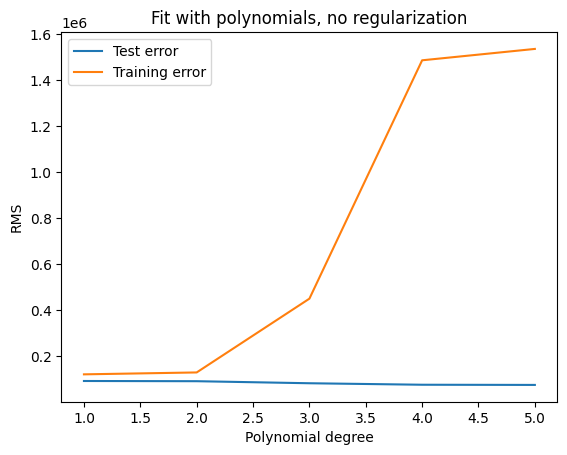

In [52]:
#Produce a plot of results
plt.plot(list(train_err.keys()), list(train_err.values()))
plt.plot(list(test_err.keys()), list(test_err.values()))
plt.ylabel('RMS')
plt.legend(['Test error','Training error'])
plt.title('Fit with polynomials, no regularization')
plt.xlabel('Polynomial degree')
plt.show()